# Name : Gaurav Bhore
# Roll no 7
# Batch 1
# ML EXP 3

# LR using OLS

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
x =np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [3]:
model = LinearRegression()
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [5]:
w = model.coef_[0]
b = model.intercept_
print(f"The slope is :{w}")
print(f"The intercept is :{b}")

The slope is :1.4999999999999993
The intercept is :0.3333333333333348


In [6]:
y_pred = model.predict(x)
print("\npredictions for training data")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x = {xi}, Actual y ={yi},Predicted y ={ypi}")


predictions for training data
x = 1, Actual y =2,Predicted y =1.8333333333333341
x = 2, Actual y =3,Predicted y =3.3333333333333335
x = 3, Actual y =5,Predicted y =4.833333333333333


In [22]:
mse = mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"Mean Squared Error is :{mse}")
print(f"R2_Score is :{r2}")

Mean Squared Error is :1.555555722919247
R2_Score is :-1.0759094459800167e-07


# LR using MLE 

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [9]:
x =np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [10]:
def neg_log_likelihood(params):
    w,b = params
    sigma2 =1 
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2/sigma2)
    return nll

In [11]:
initial_guess = [0,0]

In [18]:
result= minimize(neg_log_likelihood,initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}\nIntercept is :{b_mle}")

Slope is: -8.3681841778443e-08
Intercept is :3.3333335569014952


In [20]:
y_pred = w_mle *x+b_mle
print("\npredictions for training data")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x={xi},Actual y = {yi}, Predicted y ={ypi}")


predictions for training data
x=1,Actual y = 2, Predicted y =[3.33333347]
x=2,Actual y = 3, Predicted y =[3.33333339]
x=3,Actual y = 5, Predicted y =[3.33333331]


In [21]:
mse = mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"Mean Squared Error is :{mse}")
print(f"R2_Score is :{r2}")

Mean Squared Error is :1.555555722919247
R2_Score is :-1.0759094459800167e-07


# LR using GD

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from scipy.optimize import minimize 

In [24]:
x =np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [25]:
w,b=0,0
alpha=0.001
n_iter = 1000
n=len(x)

In [31]:
for i in range (n_iter):
    y_pred = w * x.flatten () + b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w - alpha * dw
    b -= alpha * db
print(f"Slope is :{w}")
print(f"Bias is :{b}")

Slope is :1.4539975203683184
Bias is :0.43790778240403105


# LR using GD with single parameter

In [56]:
import numpy as np
import matplotlib.pyplot as plt 

In [57]:
x =np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [58]:
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1* x +w0
    return np.sum((y-y_pred)**2)

In [59]:
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1* x +w0
    return -2/n *np.sum(x*(y-y_pred))
    

In [60]:
lr = 0.1
w1 = 4
iter = 15
w1_values = []
loss_values = []

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'tit'

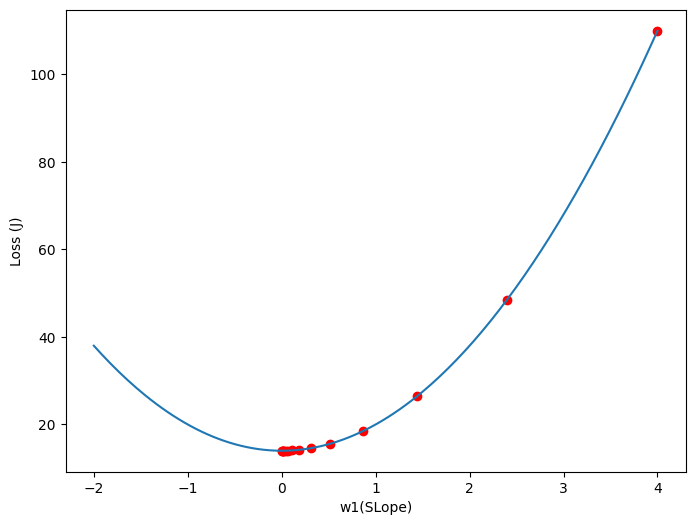

In [55]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8, 6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values , color="red", label = "GD steps")
plt.xlabel("w1(SLope)")
plt.ylabel("Loss (J)")
plt.tit;e("Gradient Descend Using SLope")
plt.legend()
plt.grid(True)
plt.show()